<a href="https://colab.research.google.com/github/anaiainza-ux/personal-finance-analysis/blob/main/Fase_4_Modelaci%C3%B3n_de_los_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fase 4: Modelación de los datos

Ana Isabel Ainza Acosta

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_excel('A01255054_Actividad2_Registro-1.xlsx')

In [ ]:
df.head()

,Número,Fecha (dd/mm/aa),Nombre actividad,Costo,Presupuesto,Tiempo invertido (en min solo numero),Tipo,Momento,No. de personas,(Solo numeros no signos ni palabras)
0,1,2024-10-08 00:00:00,Comprar termo standford,600.0,600.0,30.0,7.0,2.0,2.0,NaN
1,2,2024-11-08 00:00:00,Pagar celular,280.0,300.0,5.0,9.0,2.0,1.0,NaN
2,3,2024-12-08 00:00:00,Gasolina Jeep,1400.0,1400.0,20.0,6.0,1.0,1.0,NaN
3,4,13/8/2024,Regalo Caro,800.0,800.0,120.0,8.0,1.0,1.0,NaN
4,5,16/8/2024,Nieve Bliss,35.0,50.0,20.0,4.0,2.0,1.0,NaN


# Selcecionando datos

In [ ]:
df = df.iloc[:,3:9]

In [ ]:
df.head()

,Costo,Presupuesto,Tiempo invertido (en min solo numero),Tipo,Momento,No. de personas
0,600.0,600.0,30.0,7.0,2.0,2.0
1,280.0,300.0,5.0,9.0,2.0,1.0
2,1400.0,1400.0,20.0,6.0,1.0,1.0
3,800.0,800.0,120.0,8.0,1.0,1.0
4,35.0,50.0,20.0,4.0,2.0,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Costo                                  70 non-null     float64
 1   Presupuesto                            70 non-null     float64
 2   Tiempo invertido (en min solo numero)  70 non-null     float64
 3   Tipo                                   70 non-null     float64
 4   Momento                                70 non-null     float64
 5   No. de personas                        70 non-null     float64
dtypes: float64(6)
memory usage: 14.2 KB


# Limpiando los datos

In [ ]:
df.isnull().sum()

,0
Costo,230
Presupuesto,230
Tiempo invertido (en min solo numero),230
Tipo,230
Momento,230
No. de personas,230


In [ ]:
#desacartar dato nulos porque de 300 tenemos 70
df = df.dropna()

In [ ]:
df.isnull().values.any()

np.False_

# Decodificar datos

In [ ]:
# Cambiando la columna tipo de numeros a palabras

df.Tipo =df.Tipo.replace({1:"Alimentos/ Salud",2:"Ahorro/Inversión",3:"Ejercicio/Deporte",4:"Entretenimiento/sweet treat",5:"Académico",6:"Transporte",7:"Compras for me",8:"Regalos",9:"Gastos fijos"})

In [ ]:
dummies = pd.get_dummies(df.Tipo)
df = pd.concat([df, dummies], axis=1)
df = df.drop(columns=['Tipo'])
df.head()

,Costo,Presupuesto,Tiempo invertido (en min solo numero),Momento,No. de personas,Académico,Alimentos/ Salud,Compras for me,Ejercicio/Deporte,Entretenimiento/sweet treat,Gastos fijos,Regalos,Transporte
0,600.0,600.0,30.0,2.0,2.0,False,False,True,False,False,False,False,False
1,280.0,300.0,5.0,2.0,1.0,False,False,False,False,False,True,False,False
2,1400.0,1400.0,20.0,1.0,1.0,False,False,False,False,False,False,False,True
3,800.0,800.0,120.0,1.0,1.0,False,False,False,False,False,False,True,False
4,35.0,50.0,20.0,2.0,1.0,False,False,False,False,True,False,False,False


# Preparando datos

In [ ]:
df.columns

Index(['Costo', 'Presupuesto', 'Tiempo invertido (en min solo numero)',
       'Momento', 'No. de personas', 'Académico', 'Alimentos/ Salud',
       'Compras for me', 'Ejercicio/Deporte', 'Entretenimiento/sweet treat',
       'Gastos fijos', 'Regalos', 'Transporte'],
      dtype='object')

In [ ]:
x = df[['Presupuesto', 'Tiempo invertido (en min solo numero)',
       'Momento', 'No. de personas', 'Académico', 'Alimentos/ Salud',
       'Compras for me', 'Ejercicio/Deporte', 'Entretenimiento/sweet treat',
       'Gastos fijos', 'Regalos', 'Transporte']].values #Variables independientes
y = df['Costo'].values #Variable dependiente

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train , x_test, y_train , y_test = train_test_split(x ,y ,test_size=0.2 ,random_state=0)

In [ ]:
y_test

array([  55.,  240.,  500.,   25.,   20.,   55.,   57., 1384.,   50.,
       1000.,  231.,   65.,  280.,   20.])

# Modelando los datos

In [ ]:
from sklearn.linear_model import LinearRegression
model_regression = LinearRegression()

In [ ]:
model_regression.fit(x_train, y_train) # aprendizaje automático con base en nuestros datos

LinearRegression()

In [ ]:
x_labels = ['Presupuesto', 'Tiempo invertido (en min solo numero)',
       'Momento', 'No. de personas', 'Académico', 'Alimentos/ Salud',
       'Compras for me', 'Ejercicio/Deporte', 'Entretenimiento/sweet treat',
       'Gastos fijos', 'Regalos', 'Transporte']
c_label = ['Coeficientes']

In [ ]:
coeff_df = pd.DataFrame(model_regression.coef_, x_labels, c_label)
coeff_df

,Coeficientes
Presupuesto,0.991872
Tiempo invertido (en min solo numero),0.028314
Momento,-9.878654
No. de personas,2.824357
Académico,-21.619974
Alimentos/ Salud,-10.224877
Compras for me,31.100385
Ejercicio/Deporte,-76.387772
Entretenimiento/sweet treat,14.016353
Gastos fijos,19.964345


In [ ]:
y_pred = model_regression.predict(x_test) # realiza la predicción con el modelo generado

In [ ]:
residuals = pd.DataFrame({'Real': y_test, 'Predicción': y_pred, 'Residual': y_test - y_pred})
residuals = residuals.sample(n = 14)
residuals = residuals.sort_values(by='Real')
residuals

,Real,Predicción,Residual
4,20.0,11.598007,8.401993
13,20.0,14.271283,5.728717
3,25.0,18.947507,6.052493
8,50.0,51.374383,-1.374383
0,55.0,36.690006,18.309994
5,55.0,62.472198,-7.472198
6,57.0,54.026285,2.973715
11,65.0,71.211819,-6.211819
10,231.0,223.108439,7.891561
1,240.0,301.041146,-61.041146


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9977181417052026

# Visualización de los datos

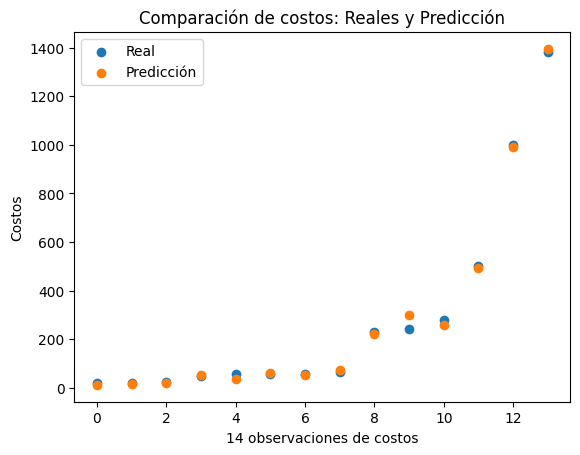

In [ ]:
import matplotlib.pyplot as plt # importamos la librería pyplot que nos permitirá graficar
import numpy as np # importamos la librería numpy que nos permitirá crear un arreglo para la muestra de 30 datos

# función mágica para desplegar el gráfico en nuestra libreta
%matplotlib inline

plt.scatter(np.arange(14), residuals['Real'], label = "Real")  # creamos el gráfico con la muestra de datos reales
plt.scatter(np.arange(14), residuals['Predicción'], label = "Predicción")  # creamos el gráfico con la muestra de datos de predicción

plt.title("Comparación de costos: Reales y Predicción") # indicamos el título del gráfico

plt.xlabel("14 observaciones de costos") # indicamos la etiqueta del eje de las x

plt.ylabel("Costos") # indicamos la etiqueta del eje de las y

plt.legend(loc='upper left') # indicamos la posición de la etiqueta de los datos

plt.show() # desplegamos el gráfico